In [1]:
import pandas as pd
import pickle
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
july_trip = pd.read_csv('../data/july_trip.csv')
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [3]:
zipcodes= gpd.read_file('../data/zipcodes.geojson')

In [5]:
july_trip['startTime'] =  pd.to_datetime(july_trip['startTime'])

In [6]:
july_trip['hour'] = july_trip['startTime'].dt.hour

In [8]:
july_trip.hour.value_counts()

19    13152
17    12732
0     12330
18    12248
21    12092
20    11961
22    11843
23    11358
16    10581
15     7948
1      5291
14     4995
13     3160
12     2037
2      1530
11      917
3       341
4       227
10      157
9        26
Name: hour, dtype: int64

In [9]:
rush_hour_morning = july_trip.loc[(july_trip['hour'] == 7)
                                 | (july_trip['hour'] == 8)
                                 | (july_trip['hour'] == 9)]

In [10]:
rush_hour_morning.hour.value_counts()

9    26
Name: hour, dtype: int64

In [33]:
rush_hour_afternoon = july_trip.loc[(july_trip['hour'] == 16) 
                                   |(july_trip['hour'] == 17)
                                   |(july_trip['hour'] == 180)]

In [13]:
rush_hour_afternoon.hour.value_counts()

17    12732
18    12248
16    10581
Name: hour, dtype: int64

In [14]:
july_trip['pubTimeStamp'] =  pd.to_datetime(july_trip['pubTimeStamp'])

In [15]:
july_trip['weekday'] = july_trip['pubTimeStamp'].dt.day_name()

In [16]:
july_trip.weekday.value_counts()

Saturday     30074
Friday       22224
Sunday       20900
Monday       17080
Thursday     15309
Wednesday    14716
Tuesday      14623
Name: weekday, dtype: int64

In [17]:
sat_df = july_trip[july_trip['weekday'] == 'Saturday']
sun_df = july_trip[july_trip['weekday'] == 'Sunday']

In [18]:
mon_df = july_trip[july_trip['weekday'] == 'Monday']
tues_df = july_trip[july_trip['weekday'] == 'Tuesday']
wed_df = july_trip[july_trip['weekday'] == 'Wednesday']
thurs_df = july_trip[july_trip['weekday'] == 'Thursday']
fri_df = july_trip[july_trip['weekday'] == 'Friday']

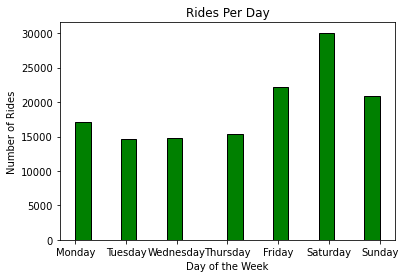

In [21]:
#Line plot for days of the week
plt.hist(july_trip.weekday, bins = 20, color = 'green', edgecolor = 'black')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Rides Per Day')
plt.show()

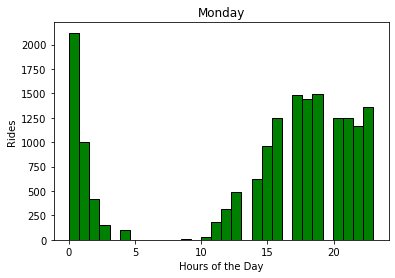

In [22]:
plt.hist(mon_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Monday')
plt.show()

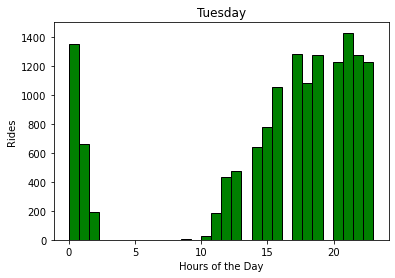

In [23]:
plt.hist(tues_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Tuesday')
plt.show()

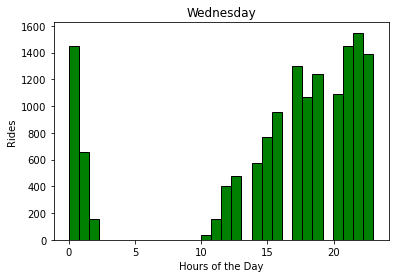

In [24]:
plt.hist(wed_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Wednesday')
plt.show()

Text(0.5, 1.0, 'Thursday')

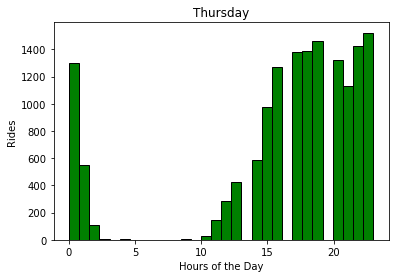

In [25]:
plt.hist(thurs_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Thursday')

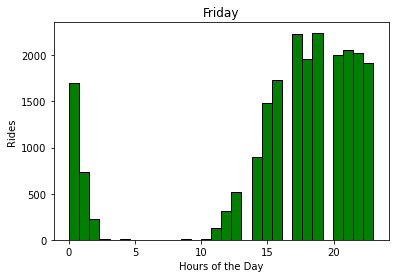

In [26]:
plt.hist(fri_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Friday')
plt.show()

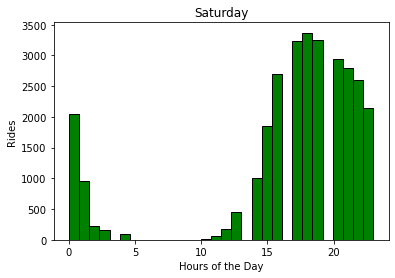

In [27]:
plt.hist(sat_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Saturday')
plt.show()

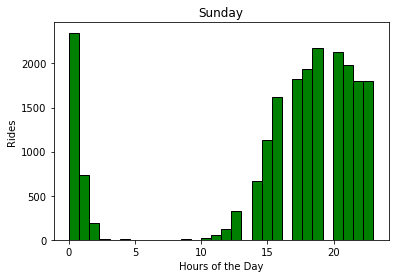

In [28]:
plt.hist(sun_df.hour, bins = 30, color='green', edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Sunday')
plt.show()